# Assignment 2 - A

In [2]:
%pip install numpy pandas matplotlib seaborn


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset and Preprocessing

In [4]:
df = pd.read_csv('audi.csv')
print(df.shape)
df.head()

(10668, 9)


model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

### No NAN values

In [5]:
print(df.isna().sum())
df = df.dropna()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


### Convert Strings to Categorical

In [6]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

In [7]:
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [8]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [9]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [10]:
def map_columns(column):
    unique_values = df[column].unique()
    mapping = {value: index + 1 for index, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
    print(f"Mapping for {column}: {mapping}")

columns_to_map = ['model', 'transmission', 'fuelType']
for column in columns_to_map:
    map_columns(column)

Mapping for model: {' A1': 1, ' A6': 2, ' A4': 3, ' A3': 4, ' Q3': 5, ' Q5': 6, ' A5': 7, ' S4': 8, ' Q2': 9, ' A7': 10, ' TT': 11, ' Q7': 12, ' RS6': 13, ' RS3': 14, ' A8': 15, ' Q8': 16, ' RS4': 17, ' RS5': 18, ' R8': 19, ' SQ5': 20, ' S8': 21, ' SQ7': 22, ' S3': 23, ' S5': 24, ' A2': 25, ' RS7': 26}
Mapping for transmission: {'Manual': 1, 'Automatic': 2, 'Semi-Auto': 3}
Mapping for fuelType: {'Petrol': 1, 'Diesel': 2, 'Hybrid': 3}


In [11]:
df.head()

model  year  price  transmission  mileage  fuelType  tax   mpg  engineSize
0      1  2017  12500             1    15735         1  150  55.4         1.4
1      2  2016  16500             2    36203         2   20  64.2         2.0
2      1  2016  11000             1    29946         1   30  55.4         1.4
3      3  2017  16800             2    25952         2  145  67.3         2.0
4      4  2019  17300             1     1998         1  145  49.6         1.0

## Center data

In [12]:
for col in df.columns:
    if col not in ['model', 'transmission', 'fuelType']:
        df[col] = (df[col] - df[col].mean())
df.head()

model      year         price  transmission       mileage  fuelType  \
0      1 -0.100675 -10396.685039             1  -9092.244001         1   
1      2 -1.100675  -6396.685039             2  11375.755999         2   
2      1 -1.100675 -11896.685039             1   5118.755999         1   
3      3 -0.100675  -6096.685039             2   1124.755999         2   
4      4  1.899325  -5596.685039             1 -22829.244001         1   

          tax        mpg  engineSize  
0   23.988564   4.629978   -0.530709  
1 -106.011436  13.429978    0.069291  
2  -96.011436   4.629978   -0.530709  
3   18.988564  16.529978    0.069291  
4   18.988564  -1.170022   -0.930709

### Compute Covariance Matrix

In [13]:
covMatrix = df.cov()
covMatrix

model          year         price  transmission  \
model            13.279320      0.885795  2.295136e+04      0.580707   
year              0.885795      4.698029  1.504674e+04      0.474953   
price         22951.364135  15046.737158  1.372375e+08   4219.196021   
transmission      0.580707      0.474953  4.219196e+03      0.740908   
mileage      -10401.000086 -40231.556769 -1.474161e+08  -4161.406222   
fuelType          0.117386     -0.131068  2.164938e+02      0.010856   
tax             100.195543     13.549613  2.802562e+05     17.726811   
mpg             -19.514160     -9.859952 -9.107351e+04     -3.749322   
engineSize        1.130703     -0.041275  4.176401e+03      0.176731   

                   mileage     fuelType            tax            mpg  \
model        -1.040100e+04     0.117386     100.195543     -19.514160   
year         -4.023156e+04    -0.131068      13.549613      -9.859952   
price        -1.474161e+08   216.493782  280256.150129  -91073.513614   
transmission -4.161406e+03     0.010856      17.726811      -3.749322   
mileage       5.524971e+08  2841.304635 -262953.809672  120264.702890   
fuelType      2.841305e+03     0.254488      -3.602458       2.336427   
tax          -2.629538e+05    -3.602458    4511.848374    -553.139078   
mpg           1.202647e+05     2.336427    -553.139078     167.696842   
engineSize    1.002151e+03     0.110576      15.919861      -2.854824   

               engineSize  
model            1.130703  
year            -0.041275  
price         4176.401498  
transmission     0.176731  
mileage       1002.150648  
fuelType         0.110576  
tax             15.919861  
mpg             -2.854824  
engineSize       0.363557

### Compute Correlation Matrix

In [14]:
corrMatrix = df.corr()
corrMatrix

model      year     price  transmission   mileage  fuelType  \
model         1.000000  0.112147  0.537631      0.185134 -0.121429  0.063855   
year          0.112147  1.000000  0.592581      0.254572 -0.789667 -0.119869   
price         0.537631  0.592581  1.000000      0.418419 -0.535357  0.036633   
transmission  0.185134  0.254572  0.418419      1.000000 -0.205680  0.025002   
mileage      -0.121429 -0.789667 -0.535357     -0.205680  1.000000  0.239618   
fuelType      0.063855 -0.119869  0.036633      0.025002  0.239618  1.000000   
tax           0.409339  0.093066  0.356157      0.306599 -0.166547 -0.106313   
mpg          -0.413523 -0.351281 -0.600334     -0.336363  0.395103  0.357648   
engineSize    0.514606 -0.031582  0.591262      0.340522  0.070710  0.363532   

                   tax       mpg  engineSize  
model         0.409339 -0.413523    0.514606  
year          0.093066 -0.351281   -0.031582  
price         0.356157 -0.600334    0.591262  
transmission  0.306599 -0.336363    0.340522  
mileage      -0.166547  0.395103    0.070710  
fuelType     -0.106313  0.357648    0.363532  
tax           1.000000 -0.635909    0.393075  
mpg          -0.635909  1.000000   -0.365621  
engineSize    0.393075 -0.365621    1.000000

### Visualize Matrices

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'model'),
  Text(0, 1.5, 'year'),
  Text(0, 2.5, 'price'),
  Text(0, 3.5, 'transmission'),
  Text(0, 4.5, 'mileage'),
  Text(0, 5.5, 'fuelType'),
  Text(0, 6.5, 'tax'),
  Text(0, 7.5, 'mpg'),
  Text(0, 8.5, 'engineSize')])

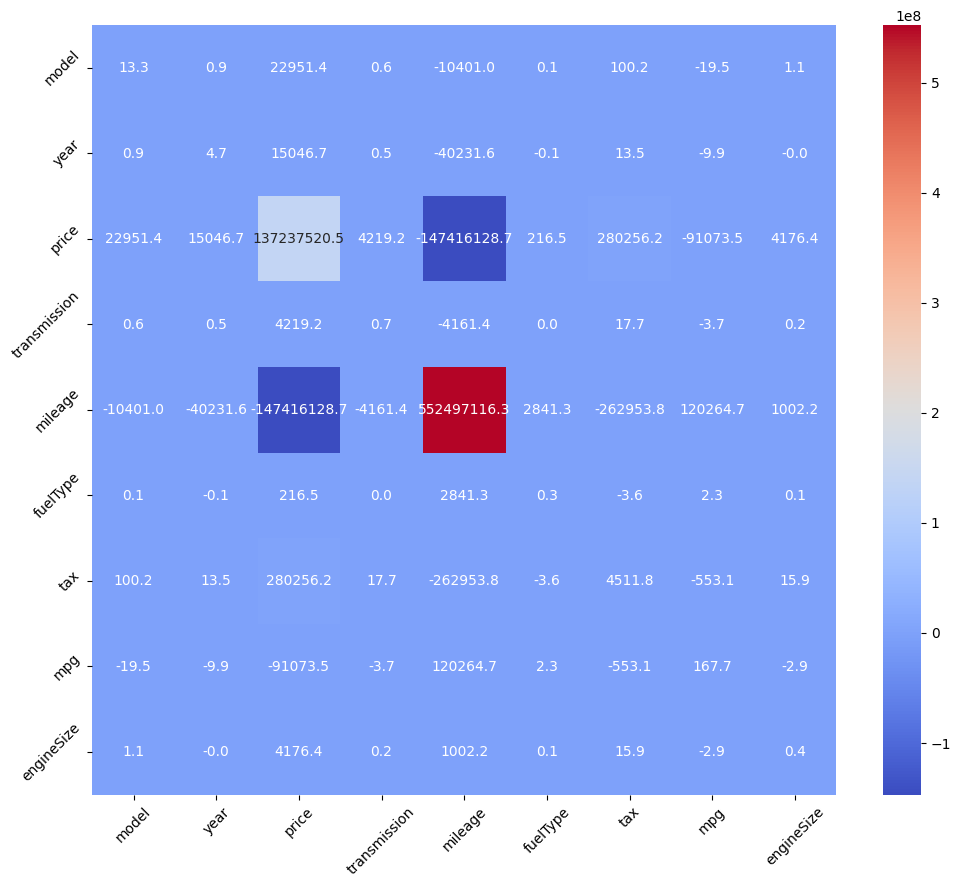

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(covMatrix, annot=True, cmap='coolwarm', fmt='.1f', xticklabels=df.columns, yticklabels=df.columns, annot_kws={"size": 10})
plt.xticks(rotation=45)
plt.yticks(rotation=45)

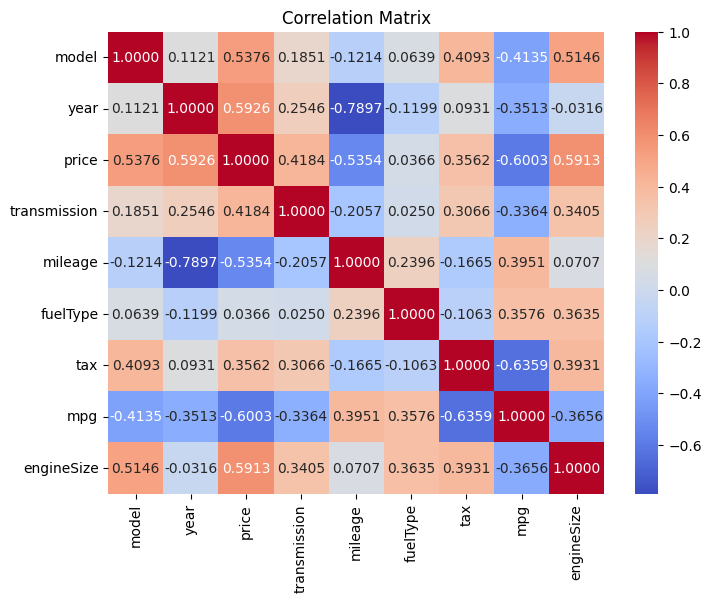

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt='.4f', xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.show()

### Eigenvector Eigenvalue Equation

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
eigenvalues, eigenvectors

(array([5.99507776e+08, 9.02275062e+07, 3.97190187e+03, 7.07435172e+01,
        8.29679328e+00, 1.48940486e+00, 5.82666872e-01, 2.16541015e-01,
        8.63492643e-02]),
 array([[-2.81606289e-05,  2.07326275e-04,  1.31703123e-02,
         -2.06268673e-03,  9.95640992e-01,  8.65485540e-02,
          2.83547206e-02, -1.29543797e-02, -7.66823158e-03],
        [-7.15608648e-05,  2.34098235e-05, -3.76186802e-03,
          1.11123020e-03, -8.35414746e-02,  9.90785210e-01,
         -4.32790762e-02,  5.07791659e-02,  8.30571780e-02],
        [-3.03821747e-01,  9.52726262e-01, -2.19606063e-03,
          3.95337607e-04, -1.71213279e-04, -6.50562941e-05,
         -3.38662905e-05, -4.11778416e-05, -2.36803491e-05],
        [-8.75148866e-06,  3.05389102e-05,  2.29722476e-03,
         -1.45140728e-03, -3.41012319e-02,  4.89057868e-02,
          9.92978868e-01, -9.22985265e-02, -4.37252249e-02],
        [ 9.52728697e-01,  3.03822336e-01, -9.15208366e-05,
         -6.59544526e-05, -4.02794762e-05,  5.

### Solving for Principal Components

In [18]:
k = 2

In [19]:
eigenvalueIndices = np.argsort(eigenvalues)[::-1]
eigenvaluesSorted = eigenvalues[eigenvalueIndices]
eigenvectorsSorted = eigenvectors[:, eigenvalueIndices]
selectedEigenvectors = eigenvectorsSorted[:k]
selectedEigenvalues = eigenvaluesSorted[:k]
print(eigenvaluesSorted)
eigenvectorsSorted

[5.99507776e+08 9.02275062e+07 3.97190187e+03 7.07435172e+01
 8.29679328e+00 1.48940486e+00 5.82666872e-01 2.16541015e-01
 8.63492643e-02]


array([[-2.81606289e-05,  2.07326275e-04,  1.31703123e-02,
        -2.06268673e-03,  9.95640992e-01,  8.65485540e-02,
         2.83547206e-02, -1.29543797e-02, -7.66823158e-03],
       [-7.15608648e-05,  2.34098235e-05, -3.76186802e-03,
         1.11123020e-03, -8.35414746e-02,  9.90785210e-01,
        -4.32790762e-02,  5.07791659e-02,  8.30571780e-02],
       [-3.03821747e-01,  9.52726262e-01, -2.19606063e-03,
         3.95337607e-04, -1.71213279e-04, -6.50562941e-05,
        -3.38662905e-05, -4.11778416e-05, -2.36803491e-05],
       [-8.75148866e-06,  3.05389102e-05,  2.29722476e-03,
        -1.45140728e-03, -3.41012319e-02,  4.89057868e-02,
         9.92978868e-01, -9.22985265e-02, -4.37252249e-02],
       [ 9.52728697e-01,  3.03822336e-01, -9.15208366e-05,
        -6.59544526e-05, -4.02794762e-05,  5.83425931e-05,
        -6.02443053e-06, -9.06448687e-06, -2.11621007e-06],
       [ 4.40564681e-06,  1.18533962e-05, -1.14340328e-03,
         2.66766617e-02,  4.07726175e-03,  8.779031

In [20]:
print(selectedEigenvalues)
selectedEigenvectors

[5.99507776e+08 9.02275062e+07]


array([[-2.81606289e-05,  2.07326275e-04,  1.31703123e-02,
        -2.06268673e-03,  9.95640992e-01,  8.65485540e-02,
         2.83547206e-02, -1.29543797e-02, -7.66823158e-03],
       [-7.15608648e-05,  2.34098235e-05, -3.76186802e-03,
         1.11123020e-03, -8.35414746e-02,  9.90785210e-01,
        -4.32790762e-02,  5.07791659e-02,  8.30571780e-02]])

### Sequential Variance Increase

In [21]:
variance = []
for i in selectedEigenvalues:
    variance.append((i/sum(eigenvaluesSorted))*100)
variance

[86.91802035570299, 13.081391985027416]

#### Taking the rest of the variances

In [22]:
variance = []
for i in eigenvaluesSorted:
    if i not in selectedEigenvalues:
        variance.append((i/sum(eigenvaluesSorted))*100)
variance

[0.0005758554955680853,
 1.0256558312167533e-05,
 1.2028882286737328e-06,
 2.1593735260013125e-07,
 8.447638725673727e-08,
 3.1394615824950657e-08,
 1.2519115538068362e-08]

## Visualization using Pair Plots

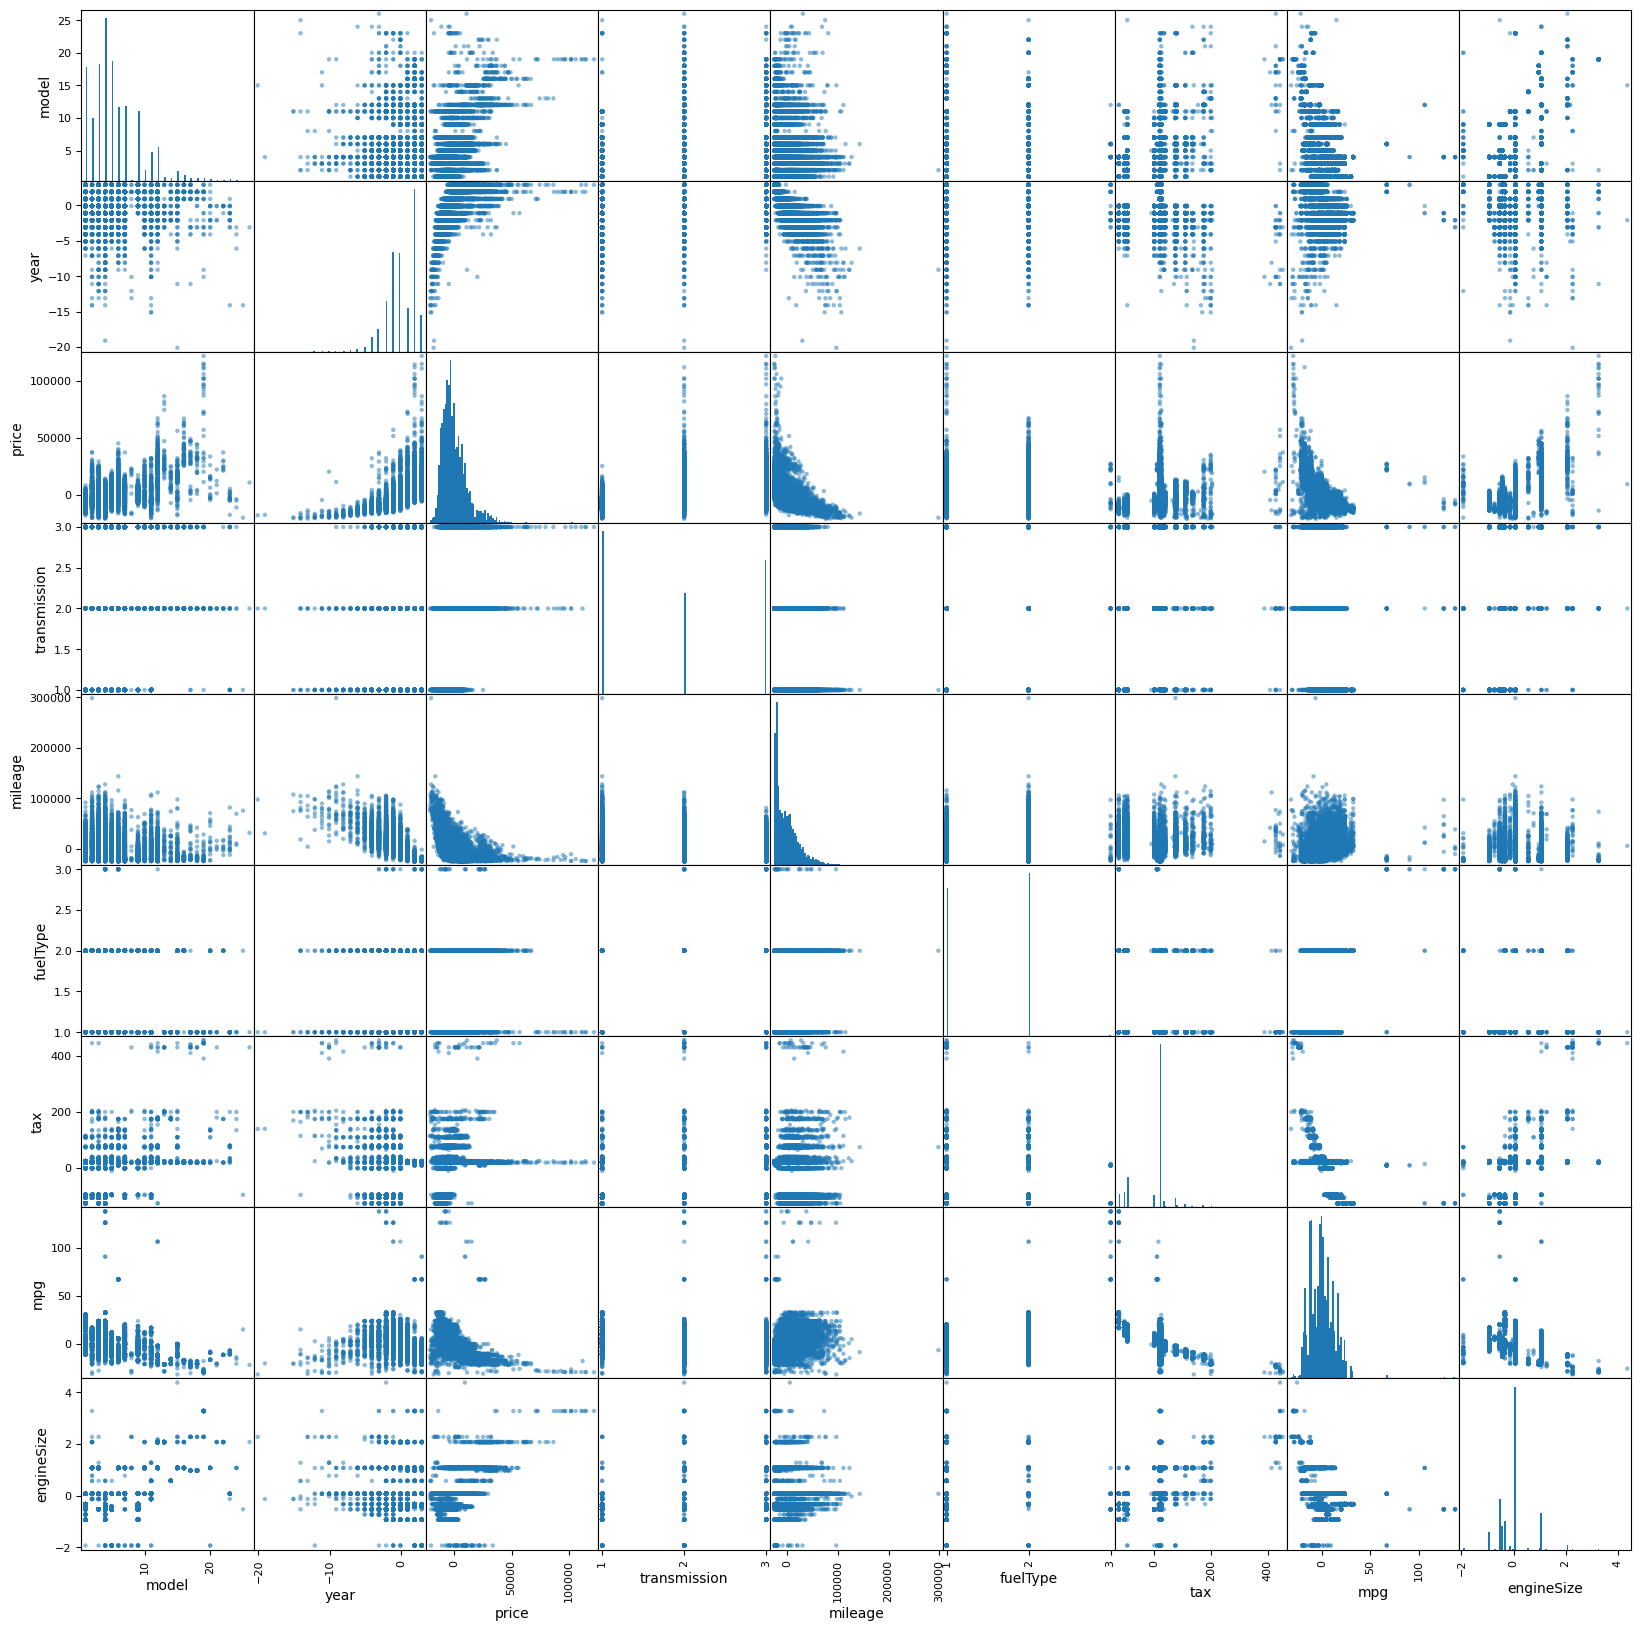

In [23]:
g = pd.plotting.scatter_matrix(df, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 100}, s = 10, alpha = 0.5)

plt.show()

### Projecting Principal Components onto pair plots and visualizing as vectors

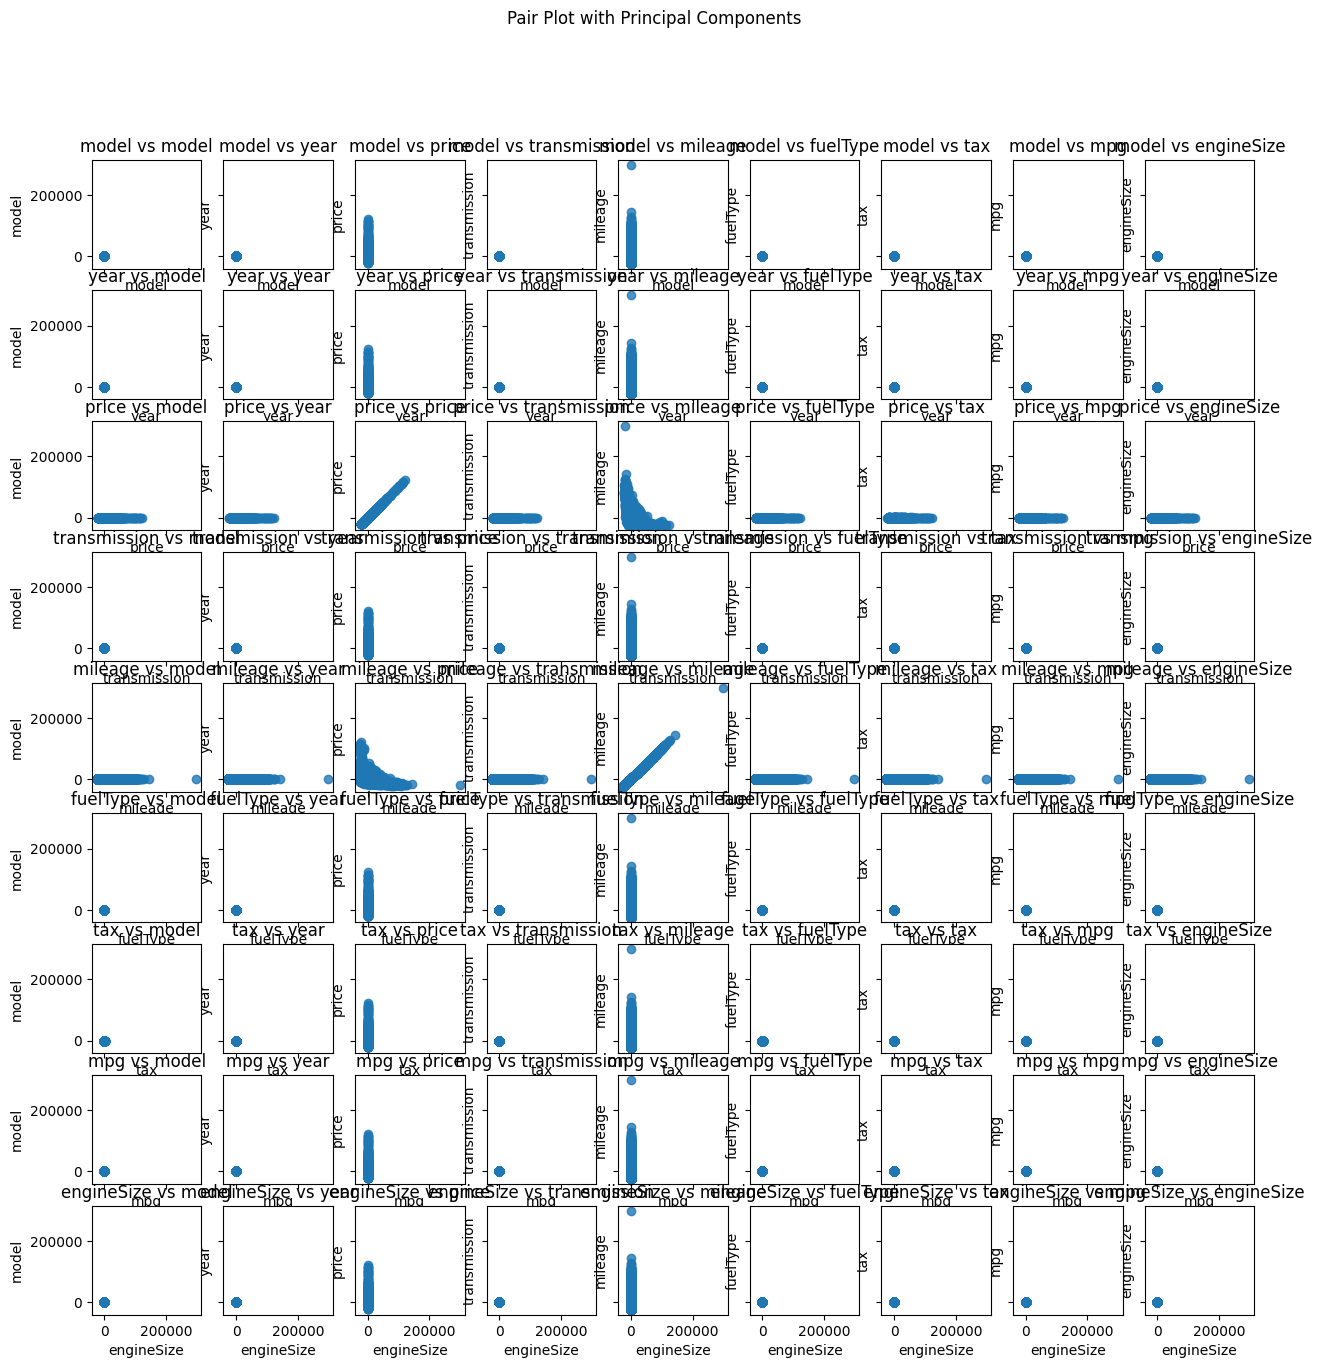

In [24]:

# Create separate scatter plots for each pair of features
fig, axes = plt.subplots(nrows=df.shape[1], ncols=df.shape[1], figsize=(15, 15), sharex='col', sharey='row')

fig.suptitle("Pair Plot with Principal Components")

for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        axes[i, j].scatter(df.iloc[:, i], df.iloc[:, j], alpha=0.8, marker='o')
        axes[i, j].set_xlabel(df.columns[i])
        axes[i, j].set_ylabel(df.columns[j])
        axes[i, j].set_title(f"{df.columns[i]} vs {df.columns[j]}")

# Visualize Principal Components as Vectors
for i, (vector, value) in enumerate(zip(selectedEigenvectors.T, selectedEigenvalues)):
    scaled_vector = vector * np.sqrt(value)  # Scale by square root of eigenvalue
    axes[0, 0].arrow(0, 0, scaled_vector[0], scaled_vector[1], head_width=0.1, head_length=0.1, fc=f'C{i}', ec=f'C{i}')

plt.show()

In [31]:
import matplotlib.pyplot as plt

# Create scatter plots for each pair of features on new lines
fig, axes = plt.subplots(nrows=df.shape[1]**2, ncols=1, figsize=(8, 8 * df.shape[1]**2))

for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        ax = axes[i * df.shape[1] + j]
        ax.scatter(df.iloc[:, i], df.iloc[:, j], marker='o', alpha=0.5, s=30, edgecolor='black', linewidth=0.5)
        ax.set_xlabel(df.columns[i], fontsize=10)
        ax.set_ylabel(df.columns[j], fontsize=10)
        ax.set_title(f"{df.columns[i]} vs {df.columns[j]}", fontsize=12)
        ax.tick_params(axis='both', which='both', labelsize=8)
        ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()